# Small Business Administration Loan Approval

## Data Insight & Visualization

### Bagja Satiaraharja

**Dataset:** SBA Loan Dataset | **Source:** [Kaggle](https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied)

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

In this final project, I will build a Flask-based web app that can recommend whether the loan is approved or not based on the given term and loan condition. 

### Import Data & Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
SBA = pd.read_csv('SBAnational.csv')
SBA.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


In [2]:
data = pd.read_csv('SBA_Loan_Data.csv')
data.head(2)

,Unnamed: 0,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,...,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,0,84,2.0,60000,48000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,60,2.0,40000,32000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [54]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [55]:
SBA['GrAppv'] = SBA['GrAppv'].apply(currencyCleaning).astype(float).astype(int)
SBA['SBA_Appv'] = SBA['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)

In [130]:
MIS_Status = pd.get_dummies(SBA['MIS_Status'], drop_first=False)
SBA['Default'] = MIS_Status['CHGOFF']

### Percentage of Default

<function matplotlib.pyplot.show(*args, **kw)>

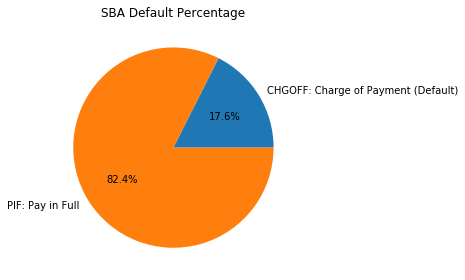

In [123]:
pieSBA = SBA.groupby('MIS_Status').count()
values = pieSBA['LoanNr_ChkDgt']
labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('SBA Default Percentage')
plt.tight_layout()
plt.show

There are 17.6% of the loan guaranteed by Small Business Administration has a default condition. If this condition happens with a big frequency and amount of loan, it can make a big loss to SBA and the bank as a lender and lead to bankruptcy to the institution. With machine learning, we can decrease the risk by making a prediction with historical data to analyze the probability of the new loan application that can lead to a default.

### **Company & Industry Insight**

**1. Company With Biggest Loan**

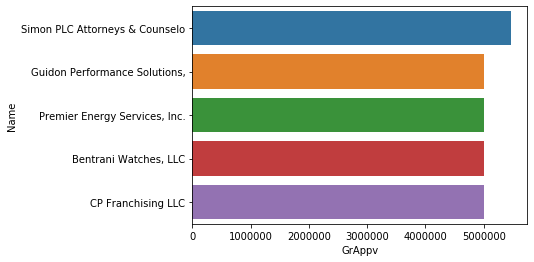

In [92]:
sns.barplot(x='GrAppv' , y='Name', data=SBA.sort_values('GrAppv',ascending=False).head(5), orient="h")

**2. Company With the highest employee**

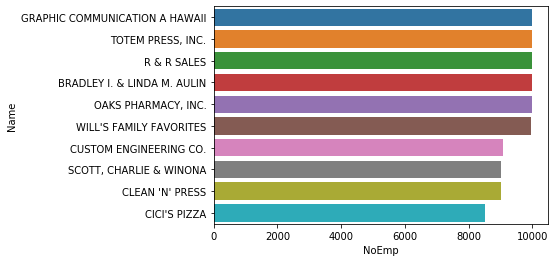

In [91]:
 sns.barplot(x='NoEmp' , y='Name', data=SBA.sort_values('NoEmp',ascending=False).head(10), orient="h")

**3. Company with the longest term**

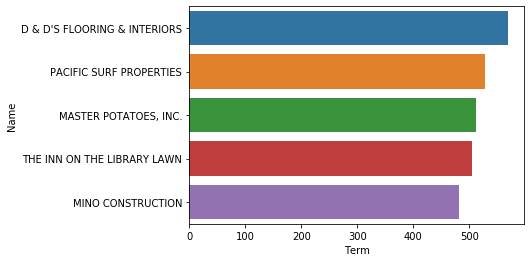

In [101]:
 sns.barplot(x='Term' , y='Name', data=SBA.sort_values('Term',ascending=False).head(5), orient="h")

**4. Industry with the most participant**

In [21]:
def naicsEngineering(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44') | (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [22]:
SBA.NAICS = SBA.NAICS.apply(naicsEngineering)

In [137]:
NAICS = SBA[SBA.NAICS != '0']

In [66]:
print(f'Most Industries amoun: {NAICS.NAICS.value_counts()[0]}')
print(f'Most Industries Percentage: {round(NAICS.NAICS.value_counts()[0]/len(NAICS)*100,2)}%')

Most Industries amoun: 127251
Most Industries Percentage: 18.25%


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

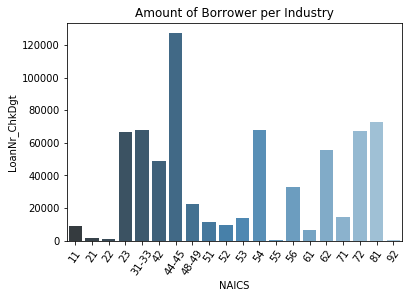

In [49]:
NAICS1 = NAICS.groupby('NAICS').count()
sns.barplot(x=NAICS1.index , y=NAICS1['LoanNr_ChkDgt'],palette="Blues_d")
plt.title('Amount of Borrower per Industry')
plt.xticks(rotation=55)

<function matplotlib.pyplot.show(*args, **kw)>

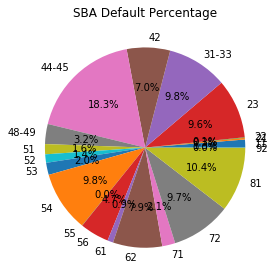

In [143]:
values = NAICS1['LoanNr_ChkDgt']
labels = NAICS1.index
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('SBA Default Percentage')
plt.tight_layout()
plt.show

From the barplot above, we can conclude that most borrowers come from the **retail trade industry** with 127251 borrowers or around 18.25% from all borrowers.

**5. Default Percentage by Industry**

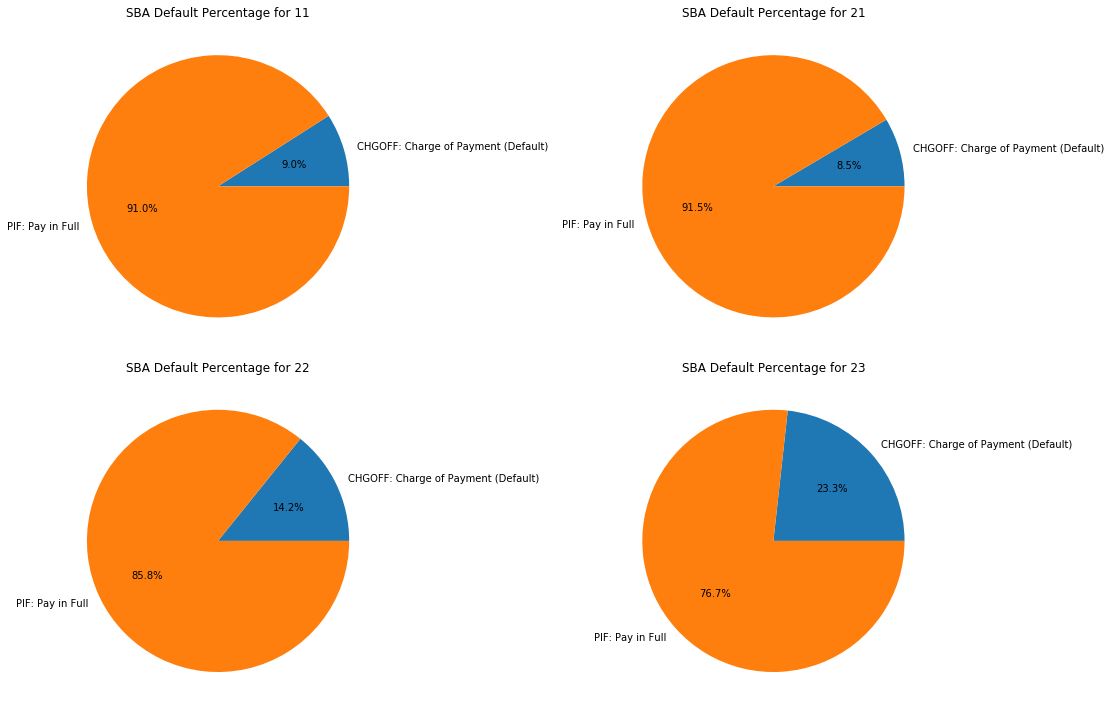

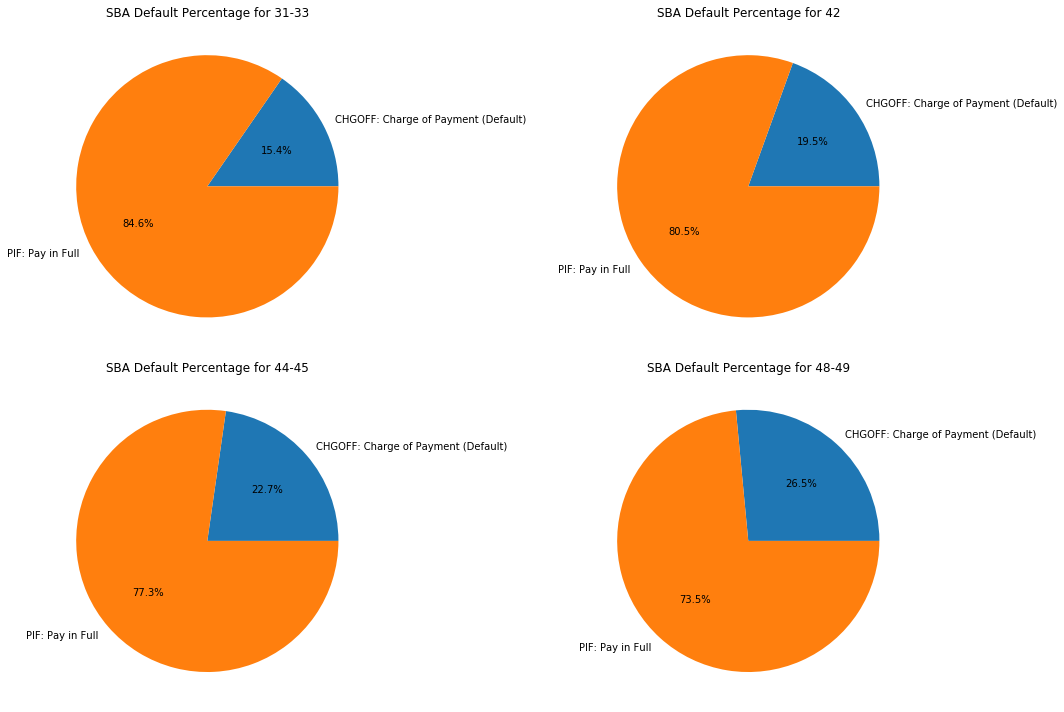

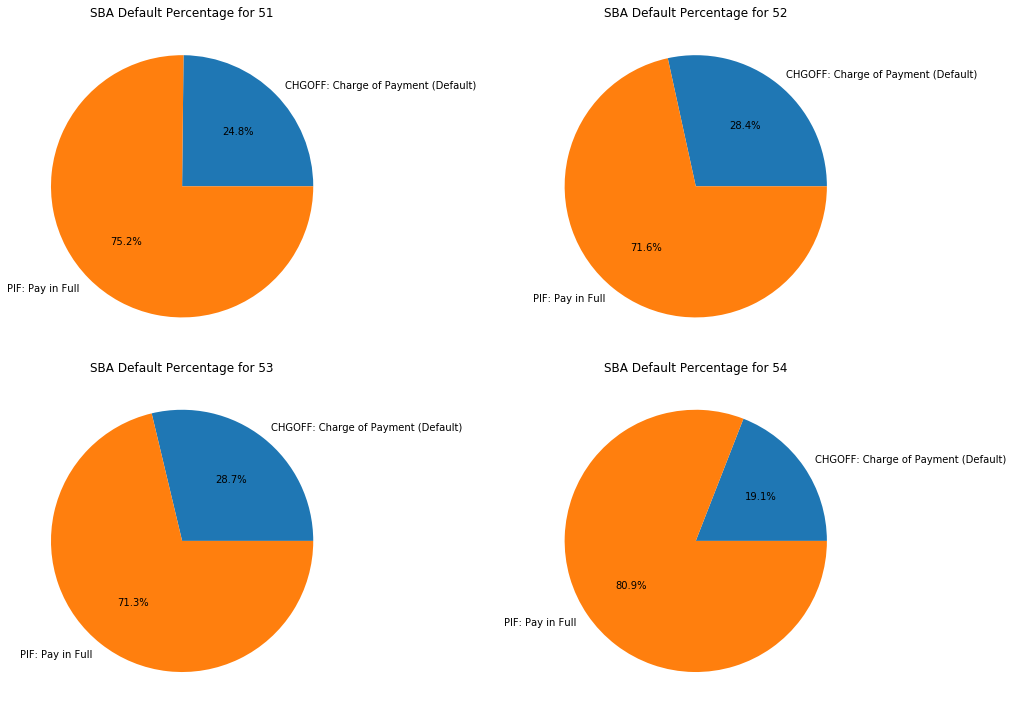

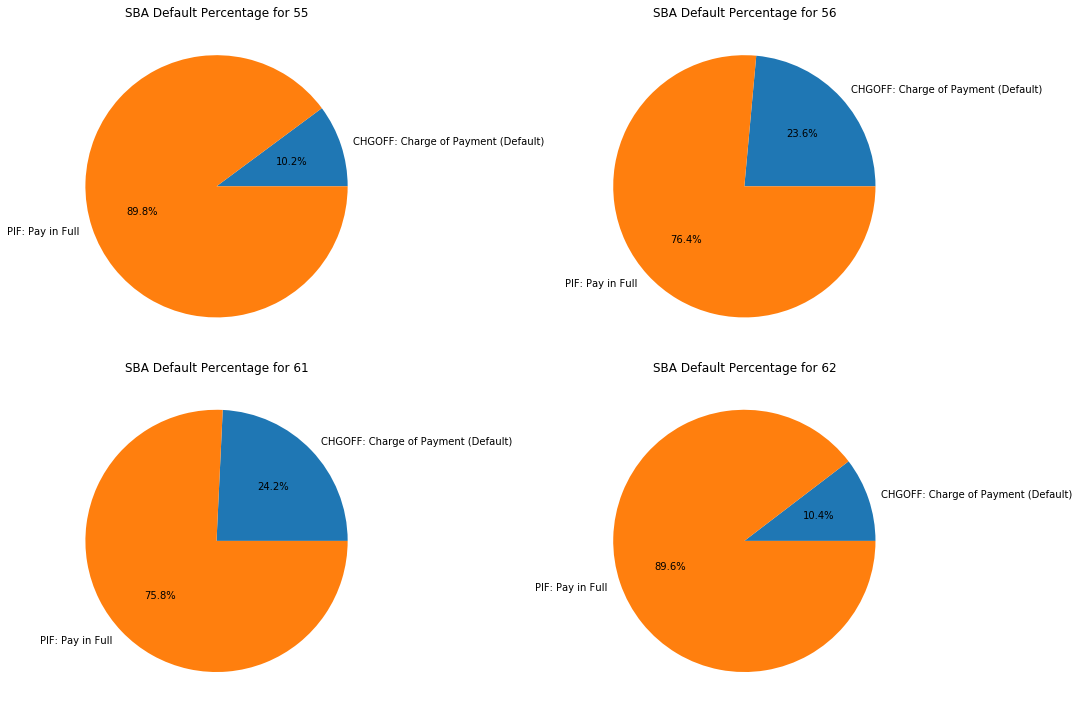

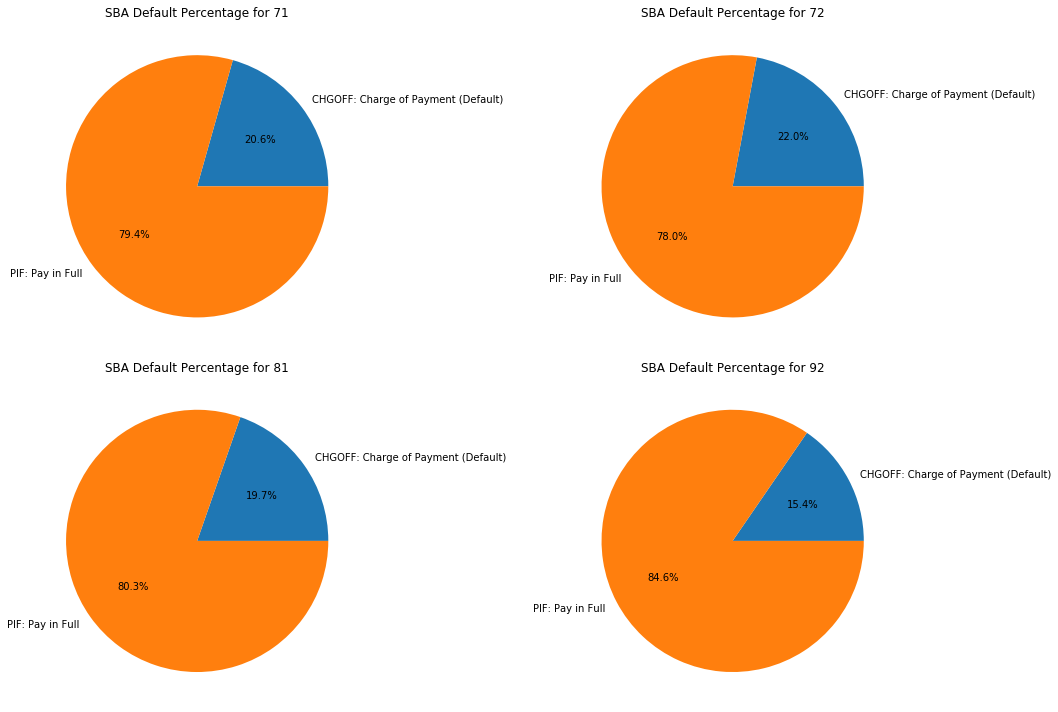

In [155]:
x = 0
y = 221    
for i in NAICS1.index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieSBA = SBA[SBA.NAICS==i].groupby('MIS_Status').count()
    values = pieSBA['LoanNr_ChkDgt']
    labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
    plt.pie(values, labels = labels, autopct='%1.1f%%')
    plt.title(f'SBA Default Percentage for {i}')
    plt.tight_layout()
    plt.show
    x+=1

With this pie chart, we can conclude that a different industry has a different risk. Some of the industry is only taking less than 10 percent of the population while the other industry can touch above 25 percent of their population.

**6. Industry with the highest gross amount of loan**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

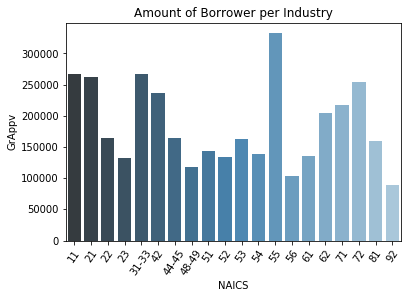

In [60]:
NAICS2 = NAICS.groupby('NAICS').mean()
sns.barplot(x=NAICS2.index , y=NAICS2['GrAppv'],palette="Blues_d")
plt.title('Amount of Borrower per Industry')
plt.xticks(rotation=55)

The industry that has the highest average capital is **Management of companies and enterprises industry**

**7. New Exist**

Explain the business conditions when making a loan.

In [281]:
SBA.NewExist.unique()

array([ 2.,  1.,  0., nan])

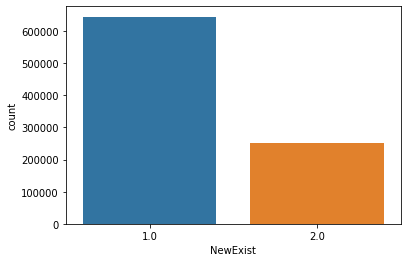

In [114]:
# 1: Exist Business, 2: New Business
sns.countplot(SBA[(SBA.NewExist == 1) | (SBA.NewExist == 2)].NewExist)

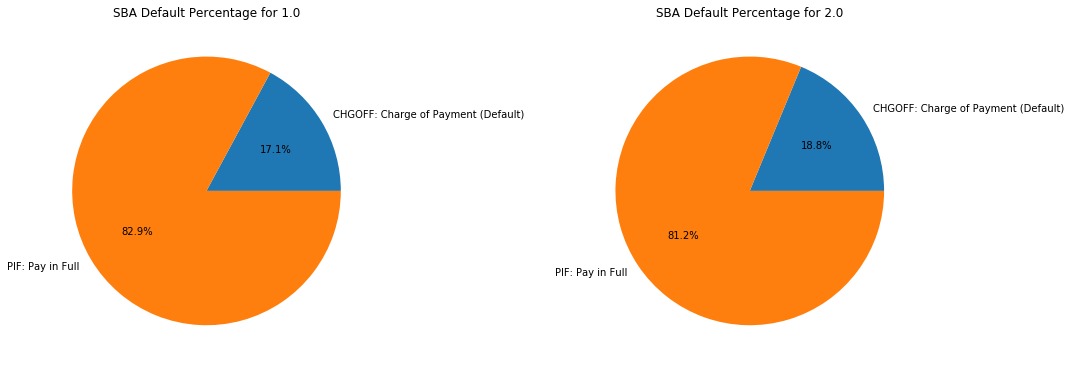

In [158]:
x = 0
y = 221    
for i in SBA[(SBA.NewExist == 1) | (SBA.NewExist == 2)].groupby('NewExist').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieSBA = SBA[SBA.NewExist==i].groupby('MIS_Status').count()
    values = pieSBA['LoanNr_ChkDgt']
    labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
    plt.pie(values, labels = labels, autopct='%1.1f%%')
    plt.title(f'SBA Default Percentage for {i}')
    plt.tight_layout()
    plt.show
    x+=1

**8. Urban Rural**

This feature explain the location of the business.

In [105]:
SBA.UrbanRural.unique()

array([0, 1, 2], dtype=int64)

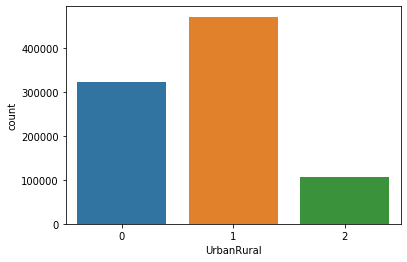

In [115]:
# 1: Urban, 2: Rural, 0: Undefined
sns.countplot(SBA.UrbanRural)

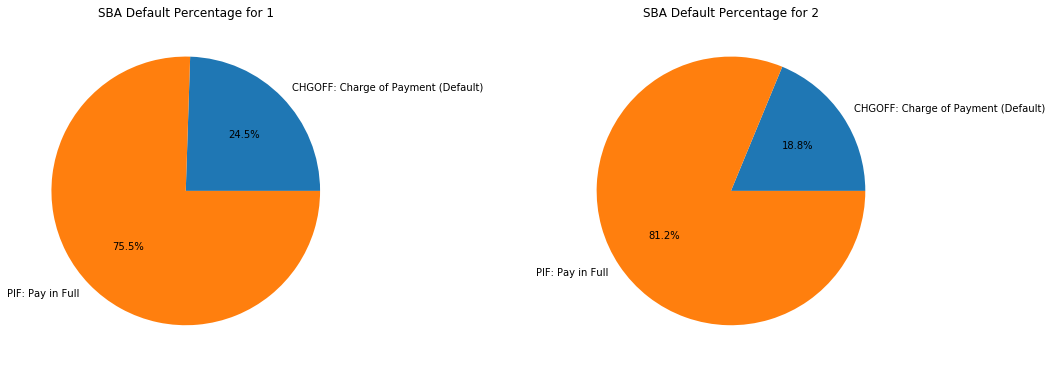

In [163]:
x = 0
y = 221    
for i in SBA[(SBA.UrbanRural == 1) | (SBA.UrbanRural == 2)].groupby('UrbanRural').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieSBA = SBA[SBA.UrbanRural==i].groupby('MIS_Status').count()
    values = pieSBA['LoanNr_ChkDgt']
    labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
    plt.pie(values, labels = labels, autopct='%1.1f%%')
    plt.title(f'SBA Default Percentage for {i}')
    plt.tight_layout()
    plt.show
    x+=1

**9. RevLineCr**

Revolving line of credit which means that if the loan has been paid, then the loan will be able to immediately borrow again. It can affect to the financial psycology that affect the behaviour of its borrower.

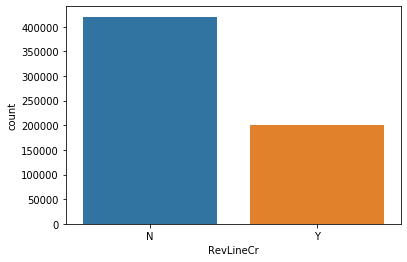

In [110]:
sns.countplot(SBA[(SBA.RevLineCr == 'N') | (SBA.RevLineCr == 'Y')].RevLineCr)

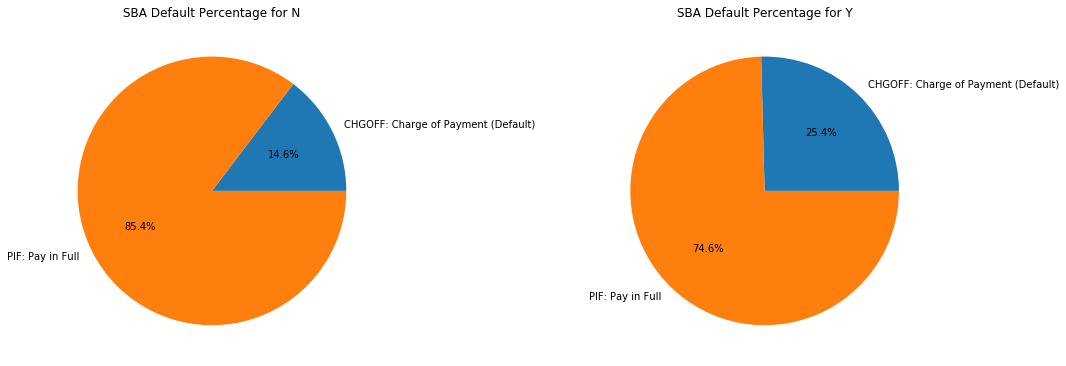

In [161]:
x = 0
y = 221    
for i in SBA[(SBA.RevLineCr == 'N') | (SBA.RevLineCr == 'Y')].groupby('RevLineCr').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieSBA = SBA[SBA.RevLineCr==i].groupby('MIS_Status').count()
    values = pieSBA['LoanNr_ChkDgt']
    labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
    plt.pie(values, labels = labels, autopct='%1.1f%%')
    plt.title(f'SBA Default Percentage for {i}')
    plt.tight_layout()
    plt.show
    x+=1

**10. LowDoc**

LowDoc Loan Program which means borrowing with little administration. It can affect to the financial psycology that affect the behaviour of its borrower.

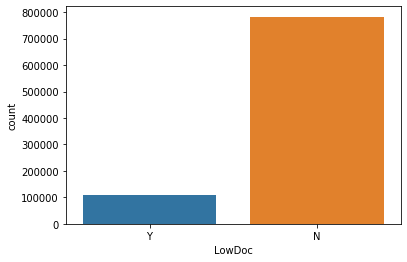

In [112]:
sns.countplot(SBA[(SBA.LowDoc == 'N') | (SBA.LowDoc == 'Y')].LowDoc)

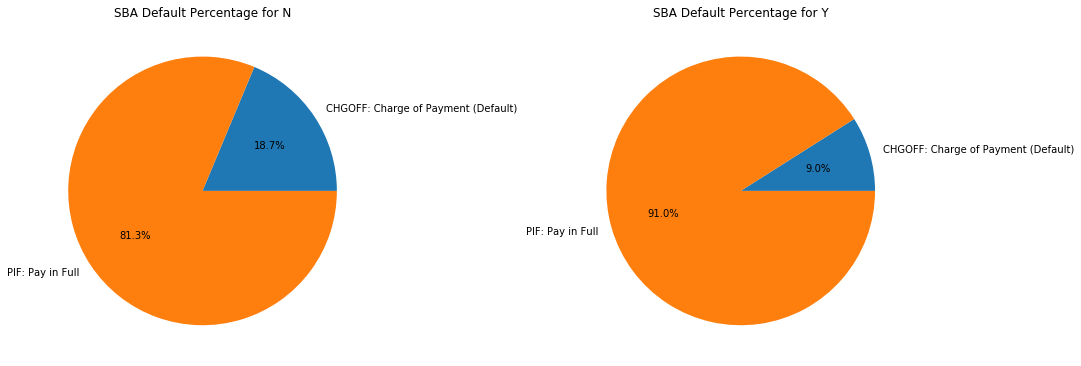

In [162]:
x = 0
y = 221    
for i in SBA[(SBA.LowDoc == 'N') | (SBA.LowDoc == 'Y')].groupby('LowDoc').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieSBA = SBA[SBA.LowDoc==i].groupby('MIS_Status').count()
    values = pieSBA['LoanNr_ChkDgt']
    labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
    plt.pie(values, labels = labels, autopct='%1.1f%%')
    plt.title(f'SBA Default Percentage for {i}')
    plt.tight_layout()
    plt.show
    x+=1

**11. Correlation Between Term and Gross Amount**

In [ ]:
MIS_Status = pd.get_dummies(data['MIS_Status'], drop_first=True)

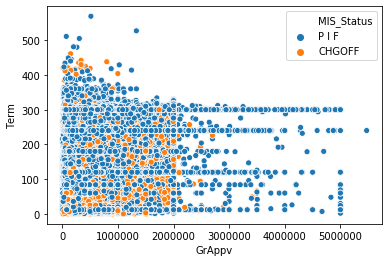

In [117]:
sns.scatterplot(x=SBA["GrAppv"], y=SBA["Term"],hue=SBA["MIS_Status"])

In [5]:
data[['GrAppv','SBA_Appv','Term','Approve']].corr()

,GrAppv,SBA_Appv,Term,Approve
GrAppv,1.000000,0.981520,0.460258,0.138798
SBA_Appv,0.981520,1.000000,0.495474,0.148743
Term,0.460258,0.495474,1.000000,0.338688
Approve,0.138798,0.148743,0.338688,1.000000


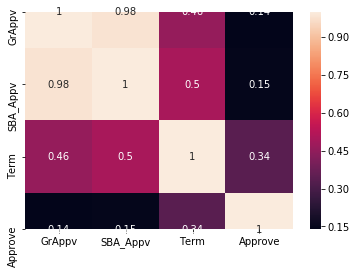

In [6]:
sns.heatmap(data[['GrAppv','SBA_Appv','Term','Approve']].corr(), annot=True)

By looking at the scatter plot and heatmap, despite having a low level of relationship between the four features, but these four features tend to reinforce each other with a positive relationship.